In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import math

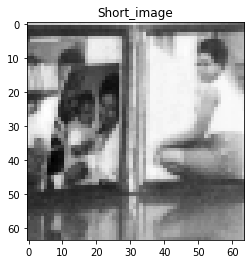

In [2]:
#ass2_1.tiff:http://sipi.usc.edu/database/download.php?vol=misc&img=5.1.12
ima = mpimg.imread('ass2_1.tiff')
n,m = ima.shape
plt.imshow(ima,cmap='gray')
ima.shape

#### short_image 64*64 for high complexity tasks

short_image = ima[160:224,20:84]
plt.title("Short_image")
plt.imshow(short_image,cmap="gray")

### DFT using Summations over two dimensions

In [3]:
def naive_get_dft(image):
    N,M = image.shape
    I_theida = np.zeros((N,M),dtype=complex)
    for u in range(0,N):
        for v in range(0,M):
            for i in range(0,N):
                for j in range(0,M):
                    I_theida[u][v] += image[i][j]*(np.exp(-2j*np.pi*u*i/N)*np.exp(-2j*np.pi*v*j/M))
    return I_theida

def naive_get_idft(image):
    N,M = image.shape
    I_theida = np.zeros((N,M),dtype=complex)
    for u in range(0,N):
        for v in range(0,M):
            for i in range(0,N):
                for j in range(0,M):
                    I_theida[u][v] += image[i][j]*(np.exp(2j*np.pi*u*i/N)*np.exp(2j*np.pi*v*j/M))
    return (I_theida/(N*M))

## Note: Below 2 cells Takes Large Amount of Time

##### note: Using np.closeall(A,B) to check A,B are Equal or not

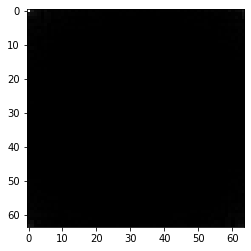

In [4]:
i_t = naive_get_dft(short_image)
plt.imshow(np.abs(i_t),cmap="gray")

In [5]:
##Testing idft(dft(I)) = I or not 
np.allclose(np.abs(naive_get_idft(naive_get_dft(short_image))),short_image)
# plt.imshow(np.abs(naive_get_idft(naive_get_dft(short_image))),cmap="gray")

True

#### Checking naive_get_dft with inbulit dft


In [6]:
if np.allclose(i_t,np.fft.fft2(short_image)):
    print("Done Correctly")
else:
    print("Something went wrong")

Done Correctly


### DFT using Complex Exponential Matrix(doing for total Image)

In [7]:
def dft_matrix(N):
    n = np.asmatrix(np.arange(N))
    return np.exp((-2j*np.pi/N)*n.T*n)

def get_dft_using_complex_exp_matrix(image):
    M,N = image.shape
    return np.asarray(dft_matrix(M)*image*dft_matrix(N))

def idft_matrix(N):
    n = np.asmatrix(np.arange(N))
    return np.exp((2j*np.pi/N)*n.T*n)

def get_idft(image):
    N,M = image.shape
    return ((idft_matrix(N)*image*idft_matrix(M))/(N*M))

In [8]:
# FFT if Needed
def fft(X):
    x = np.asarray(X)
    N = len(x)
    temp = x.reshape((1,N))
    while temp.shape[0] < N:
        m,n = temp.shape
        
        odd,even = temp[:,int(n / 2):],temp[:, :int(n / 2)]
        coeff = np.exp(-1j*np.pi*np.arange(m)/m)[:,None]
        temp = np.vstack((even+coeff*odd,even-coeff*odd))
        
    return temp.ravel()

def get_fft_image(image):
    answer = np.copy(image)
    answer = np.array([fft(row) for row in answer])
    answer = np.array([fft(col) for col in answer.T])
    return answer.T

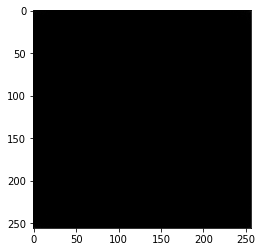

In [9]:


I_teida = get_dft_using_complex_exp_matrix(ima)
plt.imshow(np.abs(I_teida),cmap="gray")

In [10]:
# verifying dft
if np.allclose(I_teida,np.fft.fft2(ima)):
    print("Done Correctly")
else:
    print("Something went wrong")

Done Correctly


### Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transformation

In [11]:
def log_transformation(X):
    return np.log2(1+X)

def point_operator(ima,p,l):
    n,m = ima.shape
    J = np.zeros((n,m))
    for i in range(0,n):
        for j in range(0,m):
            J[i][j] = round(p*ima[i][j]+l)
            if J[i][j] > 255:
                J[i][j] = 255
            if J[i][j] < 0:
                J[i][j] = 0
    J = J.astype(int)
    return J

def FSCS(ima):
    n,m = ima.shape
    maxd = np.amax(ima)
    mind = np.amin(ima)
    p = float(255/float(maxd-mind))
    l = -float((255*mind)/float(maxd-mind))
    J = point_operator(ima,p,l)
    return J

# I_log_magnitude = log_transformation(I_magnitude)
# I_log_magnitude = np.rint(I_log_magnitude)
# plt.imshow(I_log_magnitude,cmap = "gray")
# # plt.imshow(I_phase,cmap="gray")
# # FSCS_log_image = FSCS(I_log_magnitude)
# # plt.imshow(FSCS_log_image,cmap="gray")
# # plt.imshow(I_magnitude,cmap="gray")

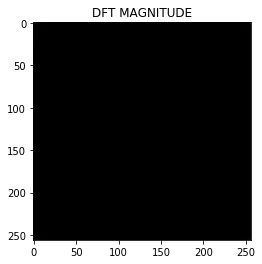

In [12]:
#### DFT Magnitude

plt.title("DFT MAGNITUDE")
plt.imshow(np.abs(I_teida),cmap="gray")

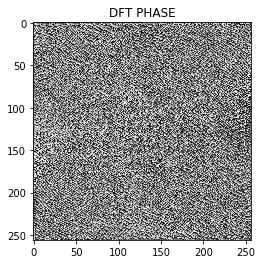

In [13]:
#### DFT Phase

plt.title("DFT PHASE")
plt.imshow(np.angle(I_teida),cmap="gray")

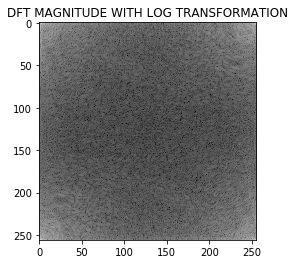

In [14]:
#### DFT Magnitude Subject to log_transformation

plt.title("DFT MAGNITUDE WITH LOG TRANSFORMATION")
plt.imshow(log_transformation(np.abs(I_teida)),cmap="gray")

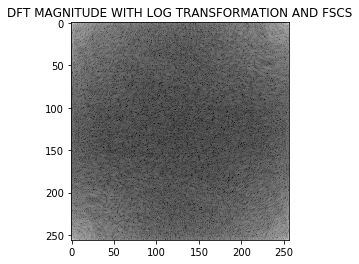

In [15]:
#### DFT Magnitude Subject to log_transformation and FSCS

plt.title("DFT MAGNITUDE WITH LOG TRANSFORMATION AND FSCS")
plt.imshow(FSCS(log_transformation(np.abs(I_teida))),cmap="gray")

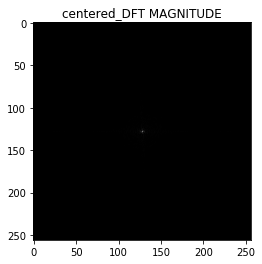

In [16]:
###centered DFT using (−1)^(i+j)

ima_2 = np.copy(ima)
n,m = ima_2.shape
for i in range(0,n):
    for j in range(0,m):
        ima_2[i][j] = math.pow(-1,i+j)*ima[i][j]

ima_2_telda = get_dft_using_complex_exp_matrix(ima_2)
ima_2_telda_magnitude = np.abs(ima_2_telda)
plt.title("centered_DFT MAGNITUDE")
plt.imshow(ima_2_telda_magnitude,cmap="gray")

###  Verify that IDFT[DFT[I]] = I

In [17]:
verfiying_matrix = np.abs(get_idft(get_dft_using_complex_exp_matrix(ima)))
original_matrix = ima
if np.allclose(verfiying_matrix,original_matrix):
    print("IDFT[DFT[I]] = I","Hence Proved")
else:
    print("Something is Wrong")
# plt.imshow(np.abs(get_idft(get_dft_using_complex_exp_matrix(ima))),cmap="gray")

IDFT[DFT[I]] = I Hence Proved


### Importance of Phase

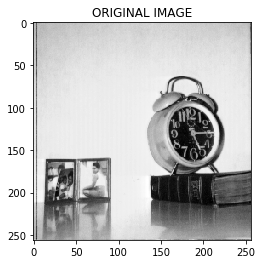

In [18]:
dft_of_image  = get_dft_using_complex_exp_matrix(ima)
phase_matrix = np.angle(dft_of_image)
magnitude_dft_matrix = np.abs(dft_of_image)
plt.title("ORIGINAL IMAGE")
plt.imshow(ima,cmap="gray")

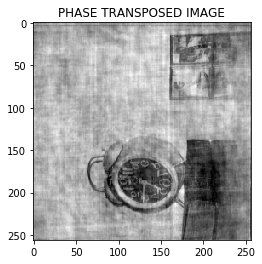

In [19]:
#### Phase Transposed
phase_matrix_transposed = phase_matrix.T
modified_image_phase_transposed = magnitude_dft_matrix*np.exp(phase_matrix_transposed*1.0j)
plt.title("PHASE TRANSPOSED IMAGE")
plt.imshow(np.abs(get_idft(modified_image_phase_transposed)),cmap="gray")

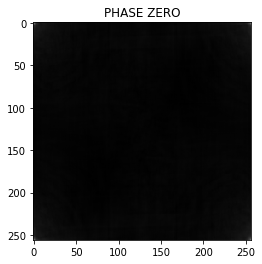

In [20]:
#### Setting Phase zero

modified_image_phase_zero = magnitude_dft_matrix*np.exp(0)
plt.title("PHASE ZERO")
plt.imshow(np.abs(get_idft(modified_image_phase_zero)),cmap="gray")

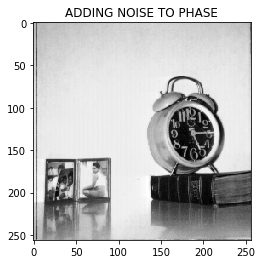

In [21]:
#### Adding noise to phase
phase_matrix = np.angle(dft_of_image)
phase_matrix_modified = phase_matrix+np.pi
getting_image_with_noise_in_phase_added = magnitude_dft_matrix*np.exp(phase_matrix_modified*1.0j)
plt.title("ADDING NOISE TO PHASE")
plt.imshow(np.abs(get_idft(getting_image_with_noise_in_phase_added)),cmap="gray")

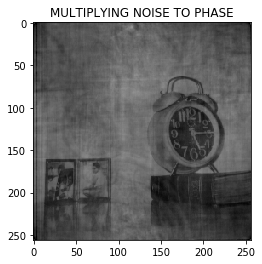

In [22]:
#multiplying Noise to phase
phase_matrix = np.angle(dft_of_image)
phase_matrix_multiplied_noise = phase_matrix*1.3
getting_image_with_noise_in_phase_multiplied = magnitude_dft_matrix*np.exp(phase_matrix_multiplied_noise*1.0j)
plt.title("MULTIPLYING NOISE TO PHASE")
plt.imshow(np.abs(get_idft(getting_image_with_noise_in_phase_multiplied)),cmap="gray")

### Doing for other 2 images

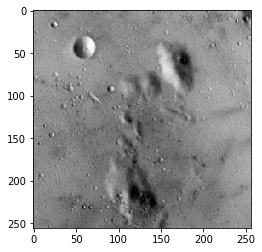

In [23]:
image2 = mpimg.imread('5.1.09.tiff')
plt.imshow(image2,cmap="gray")

In [24]:
I_teida = get_dft_using_complex_exp_matrix(ima)

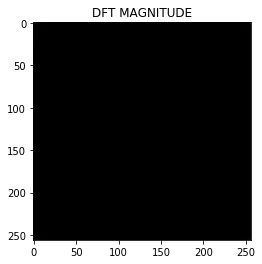

In [25]:
plt.title("DFT MAGNITUDE")
plt.imshow(np.abs(I_teida),cmap="gray")

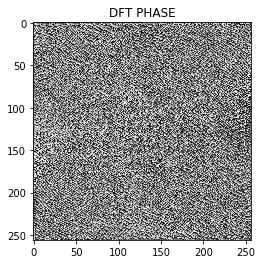

In [26]:
plt.title("DFT PHASE")
plt.imshow(np.angle(I_teida),cmap="gray")

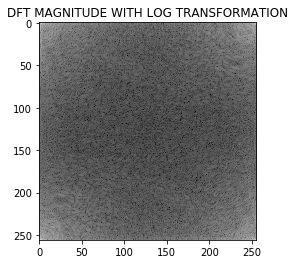

In [27]:
#### DFT Magnitude Subject to log_transformation

plt.title("DFT MAGNITUDE WITH LOG TRANSFORMATION")
plt.imshow(log_transformation(np.abs(I_teida)),cmap="gray")

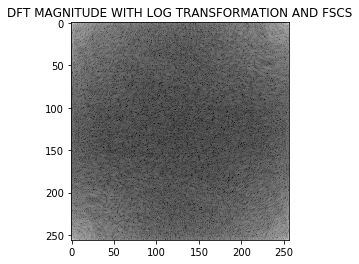

In [28]:
#### DFT Magnitude Subject to log_transformation and FSCS

plt.title("DFT MAGNITUDE WITH LOG TRANSFORMATION AND FSCS")
plt.imshow(FSCS(log_transformation(np.abs(I_teida))),cmap="gray")

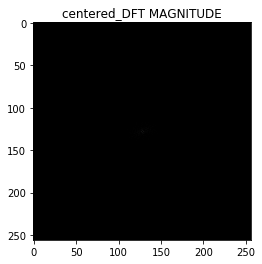

In [29]:
###centered DFT using (−1)^(i+j)

ima_2 = np.copy(image2)
n,m = ima_2.shape
for i in range(0,n):
    for j in range(0,m):
        ima_2[i][j] = math.pow(-1,i+j)*image2[i][j]

ima_2_telda = get_dft_using_complex_exp_matrix(ima_2)
ima_2_telda_magnitude = np.abs(ima_2_telda)
plt.title("centered_DFT MAGNITUDE")
plt.imshow(ima_2_telda_magnitude,cmap="gray")

In [30]:
#verify idft(dft)=i

verfiying_matrix = np.abs(get_idft(get_dft_using_complex_exp_matrix(image2)))
original_matrix = image2
if np.allclose(verfiying_matrix,original_matrix):
    print("IDFT[DFT[I]] = I","Hence Proved")
else:
    print("Something is Wrong")
# plt.imshow(np.abs(get_idft(get_dft_using_complex_exp_matrix(ima))),cmap="gray")

IDFT[DFT[I]] = I Hence Proved


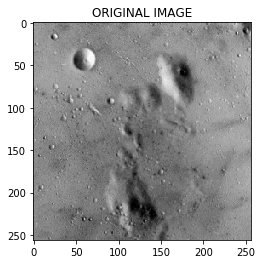

In [31]:
# phase_importance

dft_of_image  = get_dft_using_complex_exp_matrix(image2)
phase_matrix = np.angle(dft_of_image)
magnitude_dft_matrix = np.abs(dft_of_image)
plt.title("ORIGINAL IMAGE")
plt.imshow(image2,cmap="gray")

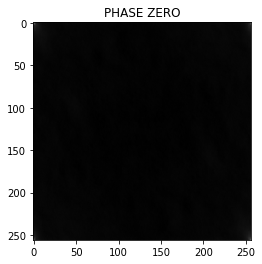

In [32]:
#### Setting Phase zero
modified_image_phase_zero = magnitude_dft_matrix*np.exp(0)
plt.title("PHASE ZERO")
plt.imshow(np.abs(get_idft(modified_image_phase_zero)),cmap="gray")

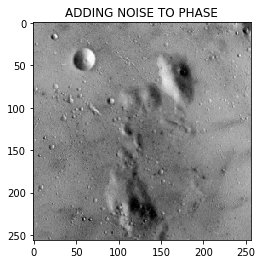

In [33]:
#### Adding noise to phase
phase_matrix = np.angle(dft_of_image)
phase_matrix_modified = phase_matrix+np.pi
getting_image_with_noise_in_phase_added = magnitude_dft_matrix*np.exp(phase_matrix_modified*1.0j)
plt.title("ADDING NOISE TO PHASE")
plt.imshow(np.abs(get_idft(getting_image_with_noise_in_phase_added)),cmap="gray")

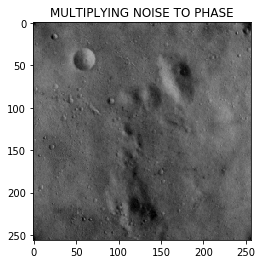

In [34]:
#multiplying Noise to phase
phase_matrix = np.angle(dft_of_image)
phase_matrix_multiplied_noise = phase_matrix*1.3
getting_image_with_noise_in_phase_multiplied = magnitude_dft_matrix*np.exp(phase_matrix_multiplied_noise*1.0j)
plt.title("MULTIPLYING NOISE TO PHASE")
plt.imshow(np.abs(get_idft(getting_image_with_noise_in_phase_multiplied)),cmap="gray")

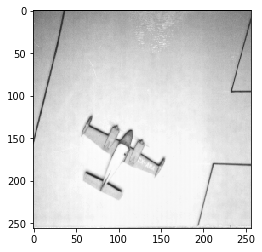

In [35]:
#last image

image2 = mpimg.imread('5.1.11.tiff')
plt.imshow(image2,cmap="gray")

In [36]:
I_teida = get_dft_using_complex_exp_matrix(ima)

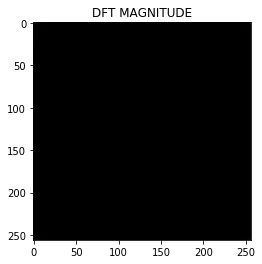

In [37]:
plt.title("DFT MAGNITUDE")
plt.imshow(np.abs(I_teida),cmap="gray")

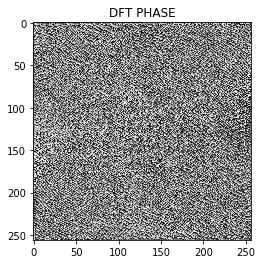

In [38]:
plt.title("DFT PHASE")
plt.imshow(np.angle(I_teida),cmap="gray")

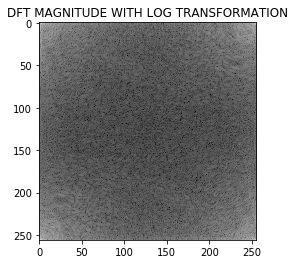

In [39]:
#### DFT Magnitude Subject to log_transformation

plt.title("DFT MAGNITUDE WITH LOG TRANSFORMATION")
plt.imshow(log_transformation(np.abs(I_teida)),cmap="gray")

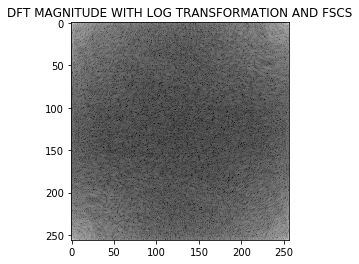

In [40]:
#### DFT Magnitude Subject to log_transformation and FSCS

plt.title("DFT MAGNITUDE WITH LOG TRANSFORMATION AND FSCS")
plt.imshow(FSCS(log_transformation(np.abs(I_teida))),cmap="gray")

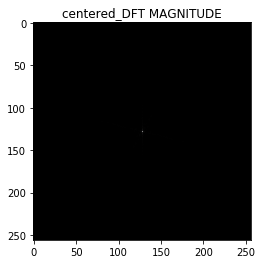

In [41]:
###centered DFT using (−1)^(i+j)

ima_2 = np.copy(image2)
n,m = ima_2.shape
for i in range(0,n):
    for j in range(0,m):
        ima_2[i][j] = math.pow(-1,i+j)*image2[i][j]

ima_2_telda = get_dft_using_complex_exp_matrix(ima_2)
ima_2_telda_magnitude = np.abs(ima_2_telda)
plt.title("centered_DFT MAGNITUDE")
plt.imshow(ima_2_telda_magnitude,cmap="gray")

In [42]:
#verify idft(dft)=i

verfiying_matrix = np.abs(get_idft(get_dft_using_complex_exp_matrix(image2)))
original_matrix = image2
if np.allclose(verfiying_matrix,original_matrix):
    print("IDFT[DFT[I]] = I","Hence Proved")
else:
    print("Something is Wrong")
# plt.imshow(np.abs(get_idft(get_dft_using_complex_exp_matrix(ima))),cmap="gray")

IDFT[DFT[I]] = I Hence Proved


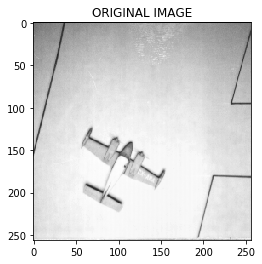

In [43]:
# phase_importance

dft_of_image  = get_dft_using_complex_exp_matrix(image2)
phase_matrix = np.angle(dft_of_image)
magnitude_dft_matrix = np.abs(dft_of_image)
plt.title("ORIGINAL IMAGE")
plt.imshow(image2,cmap="gray")

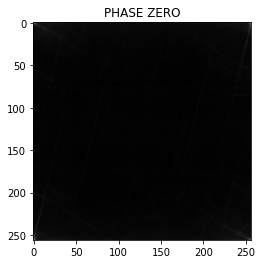

In [44]:
#### Setting Phase zero
modified_image_phase_zero = magnitude_dft_matrix*np.exp(0)
plt.title("PHASE ZERO")
plt.imshow(np.abs(get_idft(modified_image_phase_zero)),cmap="gray")

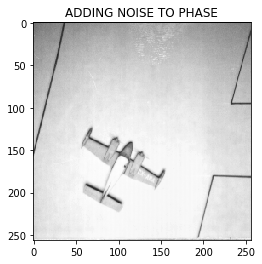

In [45]:
#### Adding noise to phase
phase_matrix = np.angle(dft_of_image)
phase_matrix_modified = phase_matrix+np.pi
getting_image_with_noise_in_phase_added = magnitude_dft_matrix*np.exp(phase_matrix_modified*1.0j)
plt.title("ADDING NOISE TO PHASE")
plt.imshow(np.abs(get_idft(getting_image_with_noise_in_phase_added)),cmap="gray")

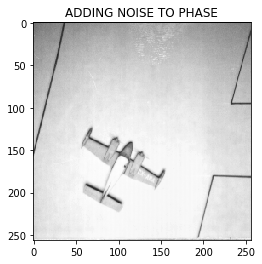

In [46]:
#### Adding noise to phase
phase_matrix = np.angle(dft_of_image)
phase_matrix_modified = phase_matrix+np.pi
getting_image_with_noise_in_phase_added = magnitude_dft_matrix*np.exp(phase_matrix_modified*1.0j)
plt.title("ADDING NOISE TO PHASE")
plt.imshow(np.abs(get_idft(getting_image_with_noise_in_phase_added)),cmap="gray")

## Question 2

In [47]:
#### Average Filter of m*m size

def avg(m):
    return np.full(shape=(m,m),fill_value = 1/(m*m))

### Circular Convolution using Summations

In [48]:
def circular_convolution_using_summations(image1,kernel):
    N,M = image1.shape
    n,m = kernel.shape
    answer = np.zeros((N,M))
    for i in range(0,N):
        for j in range(0,M):
            temp = 0
            for p in range(0,n):
                for q in range(0,m):
                    temp += image1[(i-p)%N][(j-q)%M]*kernel[p][q]
            answer[i][j] = temp
    return answer


In [49]:
#### 5*5 Avg_filter

kernel = avg(5)

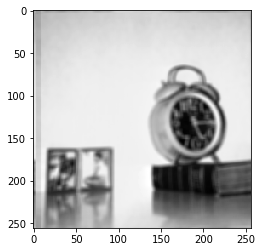

In [50]:
# Testing by convolving image and an averaging filter of size 5 × 5
circular_convoled_image = circular_convolution_using_summations(ima,kernel)
plt.imshow(circular_convoled_image,cmap="gray")

#### Verifing Circular Convolution with inbulit Function

In [51]:
if np.allclose(np.fft.ifft2(np.fft.fft2(ima) * np.fft.fft2(kernel, ima.shape)),circular_convoled_image):
    print("Circular_convolution Done Correctly")
else:
    print("Something went wrong")

Circular_convolution Done Correctly


### Linear Convolution

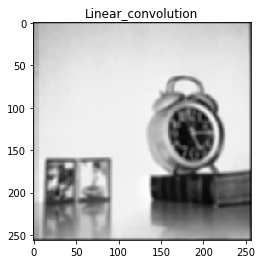

In [52]:
def zero_padding(image,kernel):
    N,M = image.shape
    n,m = kernel.shape
#     temp1 = np.zeros((N,m-1))
#     temp2 = np.zeros((n-1,m+M-1))
    #Doing some more padding than required
    temp1 = np.zeros((N,m))
    temp2 = np.zeros((n,M+m))
    answer = np.copy(image)
    answer = np.concatenate((answer,temp1),axis=1)
    answer = np.concatenate((answer,temp2),axis=0)
    return answer


def linear_convolution(image,kernel):
    temp = zero_padding(image,kernel)
    return circular_convolution_using_summations(temp,kernel)

answer = linear_convolution(ima,kernel)
Linear_convolved_naive =answer[2:258,2:258]
plt.title("Linear_convolution")
plt.imshow(Linear_convolved_naive,cmap="gray")

### Linear convolution using DFT's

In [53]:
def circular_convolution_using_DFT(image1,image2):
    I1_fourier = get_dft_using_complex_exp_matrix(image1)
    I2_fourier = get_dft_using_complex_exp_matrix(image2)
    I_modified = I1_fourier*I2_fourier
    return get_idft(I_modified)

def making_all_sides_zero(image,kernel):
    N,M = image.shape
    n,m = kernel.shape
    image2 = np.zeros((N+2*n-2,M+2*m-2))
    kernel2 = np.zeros((N+2*n-2,M+2*m-2))
    for i in range(0,N):
        for j in range(0,M):
            image2[i][j] = image[i][j]
            
    for i in range(0,n):
        for j in range(0,m):
            kernel2[i][j] = kernel[i][j]
            
    image2 = np.roll(image2,-math.floor(image2.shape[0]/2),axis=0)
    image2 = np.roll(image2,-math.floor(image2.shape[1]/2),axis=1)
    
    kernel2 = np.roll(kernel2,-math.floor(kernel2.shape[0]/2),axis = 0)
    kernel2 = np.roll(kernel2,-math.floor(kernel2.shape[1]/2),axis = 1)

    return image2,kernel2

def only_two_sides(image,kernel):
    N,M = image.shape
    n,m = kernel.shape
    image2 = np.zeros((N+N,M+M))
    kernel2 = np.zeros((N+N,M+M))
    for i in range(0,N):
        for j in range(0,M):
            image2[i][j] = image[i][j]
            
    for i in range(0,n):
        for j in range(0,m):
            kernel2[i][j] = kernel[i][j]
    return image2,kernel2

image2,kernel2 = making_all_sides_zero(ima,kernel)
image3,kernel3 = only_two_sides(ima,kernel)
print(image3.shape)
print(kernel3.shape)

(512, 512)
(512, 512)


In [54]:
###Implemented using 2 different padding methods ended up to same_answer
#### padding as said in class

answer2 = circular_convolution(image3,kernel3)

plt.imshow(np.abs(answer2[2:258,2:258]),cmap="gray")
if np.allclose(np.abs(answer2[2:258,2:258]),Linear_convolved_naive):
    print("matched with 2.2")
else:
    print(error)

NameError: name 'circular_convolution' is not defined

In [ ]:
#### padding four sides

an = circular_convolution(image2,kernel2)
plt.imshow(np.abs(a),cmap="gray")
if np.allclose(Linear_convolved_naive,an[2:258,2:258]):
    print("matched with 2.2")
else:
    print(error)

## Question 3

In [ ]:
### Adding Noise
N,M = ima.shape
image_with_noise = np.random.normal(0, 30, size=(N, M))+ima
plt.title("Image with added Noise")
plt.imshow(image_with_noise,cmap="gray")
print("Standard deviation Increased to 30 to see variation")

In [ ]:
i = 3
while i < 15:
    plt.figure(i)
    k = avg(i)
    image,kernel = only_two_sides(image_with_noise,k)
    plt.title(i)
    plt.imshow(np.abs(circular_convolution(image,kernel))[2:258,2:258],cmap="gray")
    i += 2
#     print(i)
    
print("Ended")

In [ ]:
print(5,"Looks good")
print(7,"looks good in smoothing angle")
print("after",9,"there is huge loss in information")

In [ ]:
### Gaussain Filter

def gauss2D(shape,sigma):
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [ ]:
# gauss2D((5,5),1)
i = 0.5
j = 1
while i < 10.1:
    plt.figure(j)
    k = gauss2D((5,5),i)
    image,kernel = only_two_sides(image_with_noise,k)
    plt.title(i)
    plt.imshow(np.abs(circular_convolution(image,kernel))[2:258,2:258],cmap="gray")
    i += 0.5
    j += 1
    
print("ENDED")

In [ ]:
print("After somepoint all Images are almost looks same(test for bigger standard deviations also)")
print("I can't decide which is better")

In [ ]:
plt.imshow(ima,cmap="gray")